<a href="https://colab.research.google.com/github/dude123studios/AdvancedDeepLearning/blob/main/COCO_Object_Detection_with_TF_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from google.colab.patches import cv2_imshow

In [2]:
# Apply image detector on a single image.
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

In [3]:
category_map = {
    1: 'person',
    2: 'bicycle',
    3: 'car',
    4: 'motorcycle',
    5: 'airplane',
    6: 'bus',
    7: 'train',
    8: 'truck',
    9: 'boat',
    10: 'traffic light',
    11: 'fire hydrant',
    13: 'stop sign',
    14: 'parking meter',
    15: 'bench',
    16: 'bird',
    17: 'cat',
    18: 'dog',
    19: 'horse',
    20: 'sheep',
    21: 'cow',
    22: 'elephant',
    23: 'bear',
    24: 'zebra',
    25: 'giraffe',
    27: 'backpack',
    28: 'umbrella',
    31: 'handbag',
    32: 'tie',
    33: 'suitcase',
    34: 'frisbee',
    35: 'skis',
    36: 'snowboard',
    37: 'sports ball',
    38: 'kite',
    39: 'baseball bat',
    40: 'baseball glove',
    41: 'skateboard',
    42: 'surfboard',
    43: 'tennis racket',
    44: 'bottle',
    46: 'wine glass',
    47: 'cup',
    48: 'fork',
    49: 'knife',
    50: 'spoon',
    51: 'bowl',
    52: 'banana',
    53: 'apple',
    54: 'sandwich',
    55: 'orange',
    56: 'broccoli',
    57: 'carrot',
    58: 'hot dog',
    59: 'pizza',
    60: 'donut',
    61: 'cake',
    62: 'chair',
    63: 'couch',
    64: 'potted plant',
    65: 'bed',
    67: 'dining table',
    70: 'toilet',
    72: 'tv',
    73: 'laptop',
    74: 'mouse',
    75: 'remote',
    76: 'keyboard',
    77: 'cell phone',
    78: 'microwave',
    79: 'oven',
    80: 'toaster',
    81: 'sink',
    82: 'refrigerator',
    84: 'book',
    85: 'clock',
    86: 'vase',
    87: 'scissors',
    88: 'teddy bear',
    89: 'hair drier',
    90: 'toothbrush'
}

In [4]:
def detect(filepath):
  image = cv2.imread(filepath)
  image = cv2.resize(image,(320,320))
  converted_image = image.reshape((1,320,320,3))
  converted_image = tf.convert_to_tensor(image,tf.uint8)
  converted_image = tf.reshape(converted_image,(1,320,320,3))
  detector_output = detector(converted_image)
  class_ids = detector_output["detection_classes"]
  bounding_boxes = detector_output['detection_boxes']
  num_objs = detector_output['num_detections']
  print('There are {} objects'.format(num_objs))

  bounding_boxes = bounding_boxes.numpy()
  bounding_boxes = bounding_boxes.reshape((bounding_boxes.shape[1],4))

  class_ids = class_ids.numpy()
  class_ids = class_ids.reshape((class_ids.shape[1]))

  rect_image = image.copy()
  for i, box in enumerate(bounding_boxes):
    rect_image = cv2.rectangle(rect_image,(int(box[1]*320),int(box[0]*320)),(int(box[3]*320),int(box[2]*320)),(0,0,255),1)
    rect_image = cv2.putText(rect_image, category_map[class_ids[i]], (int(box[1]*320), int(box[0]*320-2)), cv2.FONT_HERSHEY_SIMPLEX, 0.1, (255, 0, 0), 1)

  cv2_imshow(image)
  cv2_imshow(rect_image)
  plt.show()

There are [100.] objects


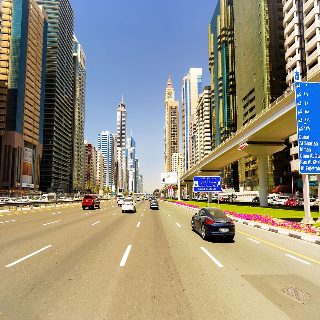

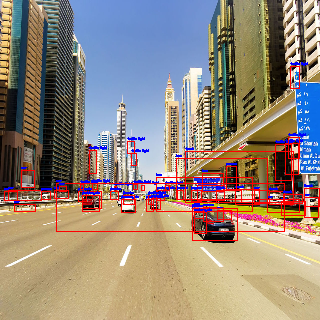

In [5]:
detect('Dubai_Main_Street.jpg')